# MNIST Dataset
the MNIST dataset is a database of 60,000 training images and 10,000 test images of handwritten digits that is commonly used for training and testing in the field of machine learning.

## Importing neccesary libraries

The MNIST dataset is available in Keras' built in 'dataset' library already, meaning we simply need to import it. We will also import a number of other libraries such as numpy, matplotlib and pandas.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as kr
from keras.datasets import mnist

## Load the training and test dataset
MNIST will give us two tuples. The first tuple is the training set and the second is the test set.


#### Now we should normalise the data

This basically means we want to scale it down between 0 and 1 which makes it easier for the network to process. It's important to note that the distance between each value is still the same.

In [41]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data() # Load datasets

X_train = kr.utils.normalize(X_train, axis=1) # Normalize x train and test sets
X_test = kr.utils.normalize(X_test, axis=1)

## Print the shape of each dataset
We can print the shape of the data in each dataset to confirm the number of images and the shape of each image. We see here that we have 60'000 images in our training set and each image is 28 pixels x 28. 

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plot the first image of the X_train dataset
Now we can plot the first image of the x_train dataset using matplotlib.

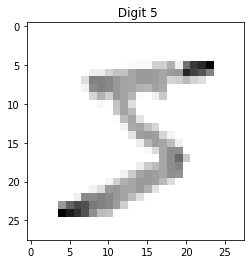

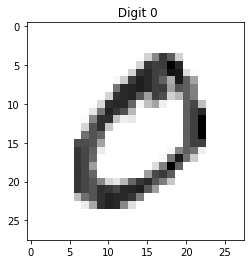

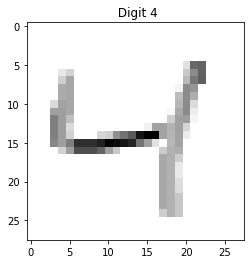

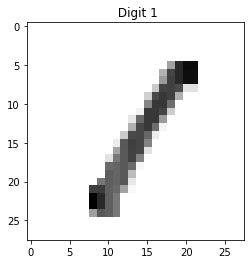

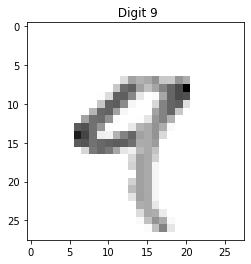

In [43]:
for i in range(0,5):
    plt.imshow(X_train[i], plt.cm.binary) # this is not a color image so we use colormap to change it to black and white
    plt.title(" Digit " + str(y_train[i]))
    plt.show()

## Below is an array of the actual data we want to pass through our neural network.

Below, the 0's in the array repersent the blank space in the image and the numbers ranging from 0.01-0.99 represent the pencil stroke of the digit.

Before normalisation these numbers would have ranged between 0-255.

In [44]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Now we are ready to build our model

A sequential model is a linear stack of layers. We make our input layer flatten the data being passed to it. This is neccesary because our images are 28x28 multi-dimensional arrays which we do not want.

Our next two layers are dense layers. A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. We pass them two parameters; how many neurons in the layer and the activasion function.

Our final layer has 10 neurons specified as our input data ranges from 0-9 and our activation function is softmax for probability distribution.

In [104]:
model = kr.models.Sequential() # Create a new sequential neural network
model.add(kr.layers.Flatten()) # Input layer
model.add(kr.layers.Dense(600, activation="relu", input_shape="784")) # 128 neurons and the 'basic' activation function.
model.add(kr.layers.Dense(400, activation="relu"))
model.add(kr.layers.Dense(10, activation="softmax"))

# Compiling and train our model
Here we pass 3 parameters; the optimizer to use, the loss metric (the degree of error) and the metrics to track.

To train the model we use the fit function. We pass in what we want trained and the epochs. The epochs is simply how many times we want our neural network to go over the training data set. If we set it to 1, the neural network will get to see the data once.

In [112]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Played around with 'sgd' and 'rmsporp' optimizer also.
model.fit(X_train, y_train, epochs=3, batch_size=10)

Epoch 1/3
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0695 - accuracy: 0.9785
Epoch 2/3
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 3/3
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0428 - accuracy: 0.9869


# Calculate validation loss and accuracy
Next we should calculate our validatio loss and accuracy. This is where the test sets come in. To do this we use the evaluate function.

In [113]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 2s 187us/step
0.1040648699211215 0.9761000275611877


[2.6701935e-12 9.5515436e-11 4.6734350e-09 4.9852401e-06 1.1459639e-11
 2.4648186e-09 5.4574209e-18 9.9996781e-01 2.4153507e-10 2.7217204e-05]


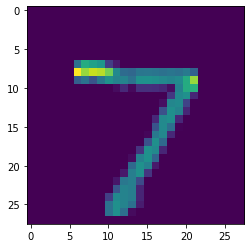

In [114]:
predictions = model.predict(X_test)
print(predictions[0])
np.argmax(predictions[0])
plt.imshow(X_test[0])

In [115]:
import random
i = random.randint(1, 101)
    
np.argmax(predictions[i])


4

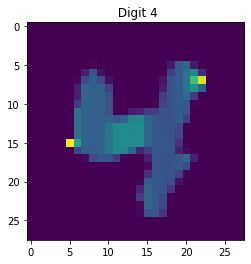

In [116]:
plt.imshow(X_test[i])
plt.title(" Digit " + str(y_test[i]) )
plt.show()

# A summary of the model
We can output a summary of the model we have built with the summary function. This function gives us the layers in our model and their shape as well as parameters


In [117]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_32 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                4010      
Total params: 715,410
Trainable params: 715,410
Non-trainable params: 0
_________________________________________________________________


# Save the model
We should now save the model for use locally in our flask web server.

In [118]:
model.save('MyModel8')